# Import Libraries

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


# Read Data

Data source: https://www.kaggle.com/datasets/jaganadhg/house-hold-energy-data

In [194]:
df = pd.read_csv('D202.csv')

In [195]:
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


# Seeing the number of unique values for each column

In [196]:
df.nunique()

TYPE            1
DATE          733
START TIME     96
END TIME       96
USAGE         200
UNITS           1
COST           49
NOTES           0
dtype: int64

Since the values of TYPE and UNITS columns are all the same, we can delete them both 

In [197]:
df = df.drop(columns=['TYPE','UNITS'])

In [198]:
df

,DATE,START TIME,END TIME,USAGE,COST,NOTES
0,10/22/2016,0:00,0:14,0.01,$0.00,NaN
1,10/22/2016,0:15,0:29,0.01,$0.00,NaN
2,10/22/2016,0:30,0:44,0.01,$0.00,NaN
3,10/22/2016,0:45,0:59,0.01,$0.00,NaN
4,10/22/2016,1:00,1:14,0.01,$0.00,NaN
...,...,...,...,...,...,...
70363,10/24/2018,22:45,22:59,0.02,$0.00,NaN
70364,10/24/2018,23:00,23:14,0.03,$0.01,NaN
70365,10/24/2018,23:15,23:29,0.03,$0.01,NaN
70366,10/24/2018,23:30,23:44,0.03,$0.01,NaN


# Checking null values for each column

In [199]:
df.isnull().sum()

DATE              0
START TIME        0
END TIME          0
USAGE             0
COST              0
NOTES         70368
dtype: int64

Since the 'NOTES' column contains only null values, we can drop it.

In [200]:
df = df.drop(columns=['NOTES'])

In [201]:
df

,DATE,START TIME,END TIME,USAGE,COST
0,10/22/2016,0:00,0:14,0.01,$0.00
1,10/22/2016,0:15,0:29,0.01,$0.00
2,10/22/2016,0:30,0:44,0.01,$0.00
3,10/22/2016,0:45,0:59,0.01,$0.00
4,10/22/2016,1:00,1:14,0.01,$0.00
...,...,...,...,...,...
70363,10/24/2018,22:45,22:59,0.02,$0.00
70364,10/24/2018,23:00,23:14,0.03,$0.01
70365,10/24/2018,23:15,23:29,0.03,$0.01
70366,10/24/2018,23:30,23:44,0.03,$0.01


# Remove dollar sign in COST column
We want to take only the values

In [202]:
df["COST"] = df["COST"].str.replace("$", "", regex=False).astype(float)

In [203]:
df

,DATE,START TIME,END TIME,USAGE,COST
0,10/22/2016,0:00,0:14,0.01,0.00
1,10/22/2016,0:15,0:29,0.01,0.00
2,10/22/2016,0:30,0:44,0.01,0.00
3,10/22/2016,0:45,0:59,0.01,0.00
4,10/22/2016,1:00,1:14,0.01,0.00
...,...,...,...,...,...
70363,10/24/2018,22:45,22:59,0.02,0.00
70364,10/24/2018,23:00,23:14,0.03,0.01
70365,10/24/2018,23:15,23:29,0.03,0.01
70366,10/24/2018,23:30,23:44,0.03,0.01


# Range of the DATE column

In [204]:
df

,DATE,START TIME,END TIME,USAGE,COST
0,10/22/2016,0:00,0:14,0.01,0.00
1,10/22/2016,0:15,0:29,0.01,0.00
2,10/22/2016,0:30,0:44,0.01,0.00
3,10/22/2016,0:45,0:59,0.01,0.00
4,10/22/2016,1:00,1:14,0.01,0.00
...,...,...,...,...,...
70363,10/24/2018,22:45,22:59,0.02,0.00
70364,10/24/2018,23:00,23:14,0.03,0.01
70365,10/24/2018,23:15,23:29,0.03,0.01
70366,10/24/2018,23:30,23:44,0.03,0.01


We can see that the date start at 2016 and ends in 2018

# Plotting the whole data

## Plotting electricity usage

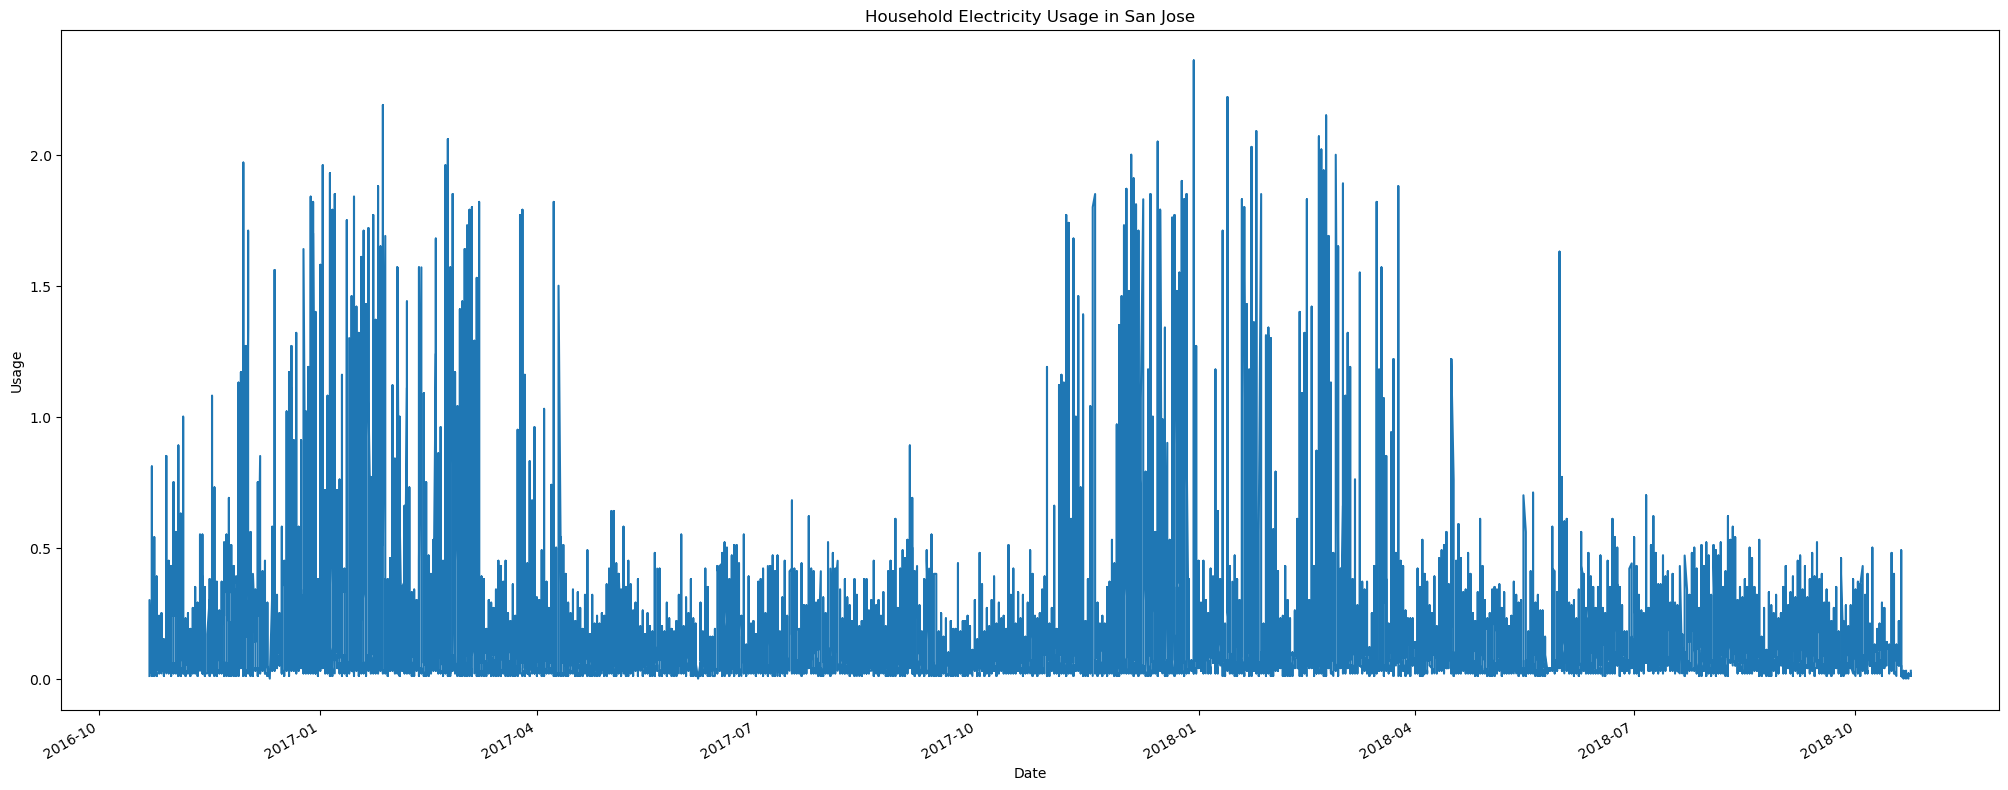

In [205]:
import matplotlib.pyplot as plt

usage_plot = df[['DATE','USAGE']]

usage_plot['DATE'] = pd.to_datetime(usage_plot['DATE'])
usage_plot.set_index('DATE', inplace=True)
plt.figure(figsize=(25, 10))
usage_plot['USAGE'].plot()
plt.title('Household Electricity Usage in San Jose')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.show()

The electricity consumption exhibits significant peaks during specific periods:
- From the end of 2016 to the beginning of 2017
- From the end of 2017 to the beginning of 2018
- During one particular month in 2018

Notice that we have one pattern here: the electricity usage is always distinctly high from the end of each year through the start of the following year. Further observations can be done later.

## Plotting Electricity Cost

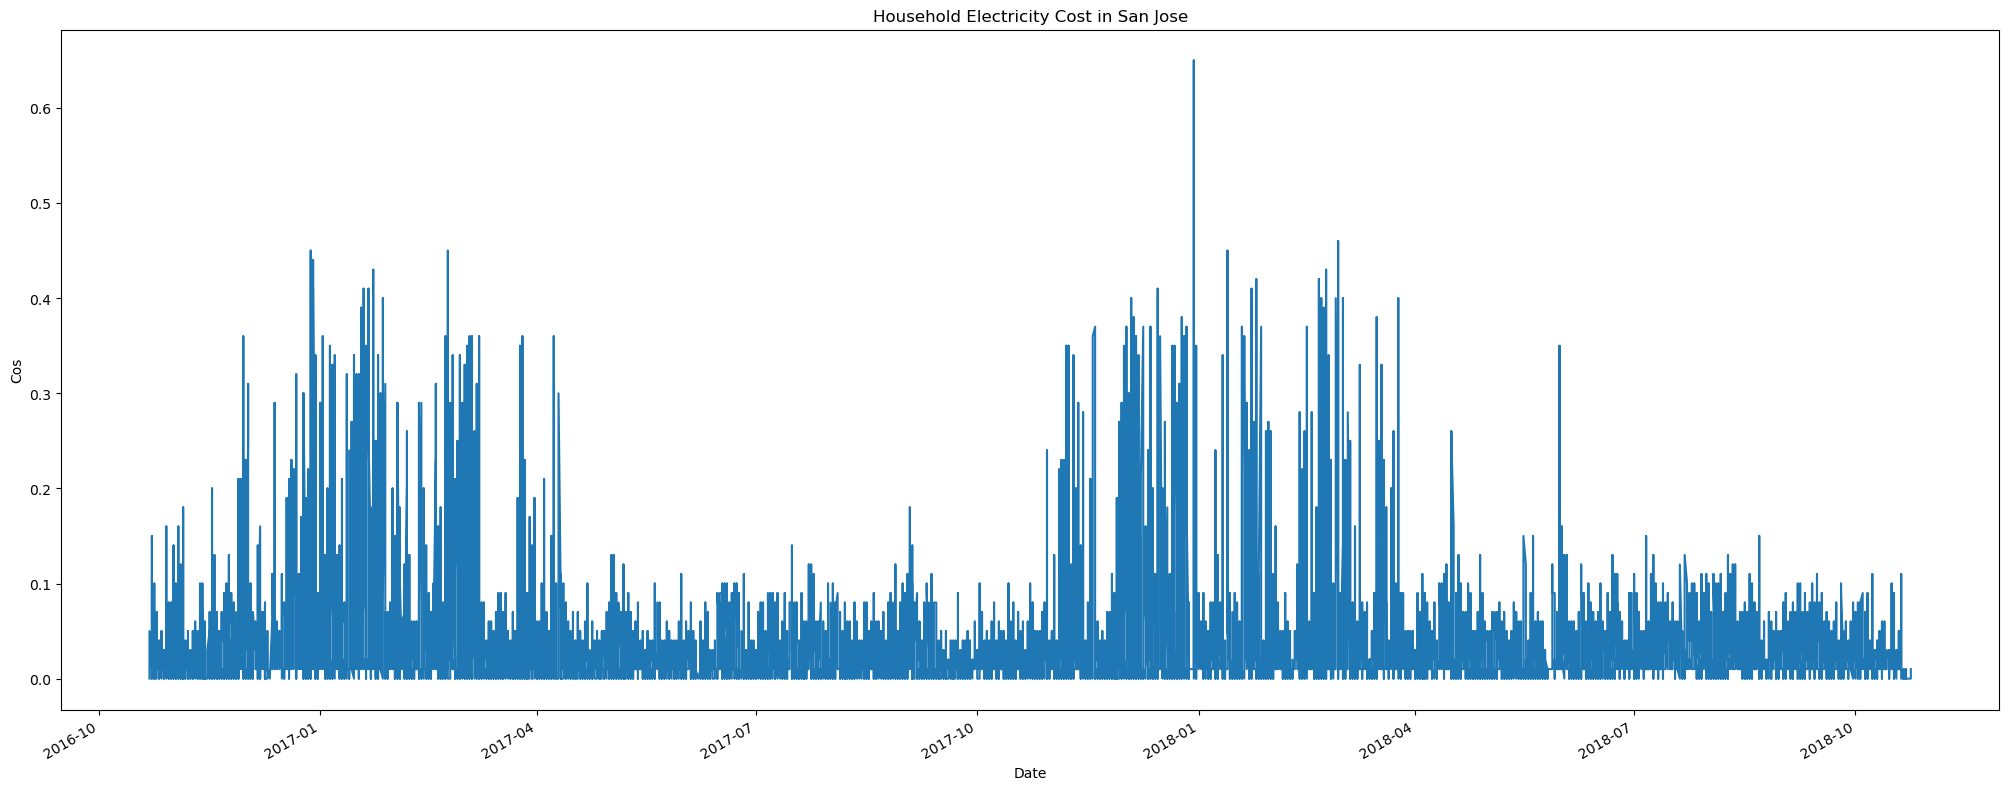

In [206]:
import matplotlib.pyplot as plt

usage_plot = df[['DATE','COST']]

usage_plot['DATE'] = pd.to_datetime(usage_plot['DATE'])
usage_plot.set_index('DATE', inplace=True)
plt.figure(figsize=(25, 10))
usage_plot['COST'].plot()
plt.title('Household Electricity Cost in San Jose')
plt.xlabel('Date')
plt.ylabel('Cos')
plt.show()

The pattern is quite the same with electricity usage. We can observe the correlation between them.

# Correlation between electricity usage and cost

<Axes: xlabel='USAGE', ylabel='COST'>

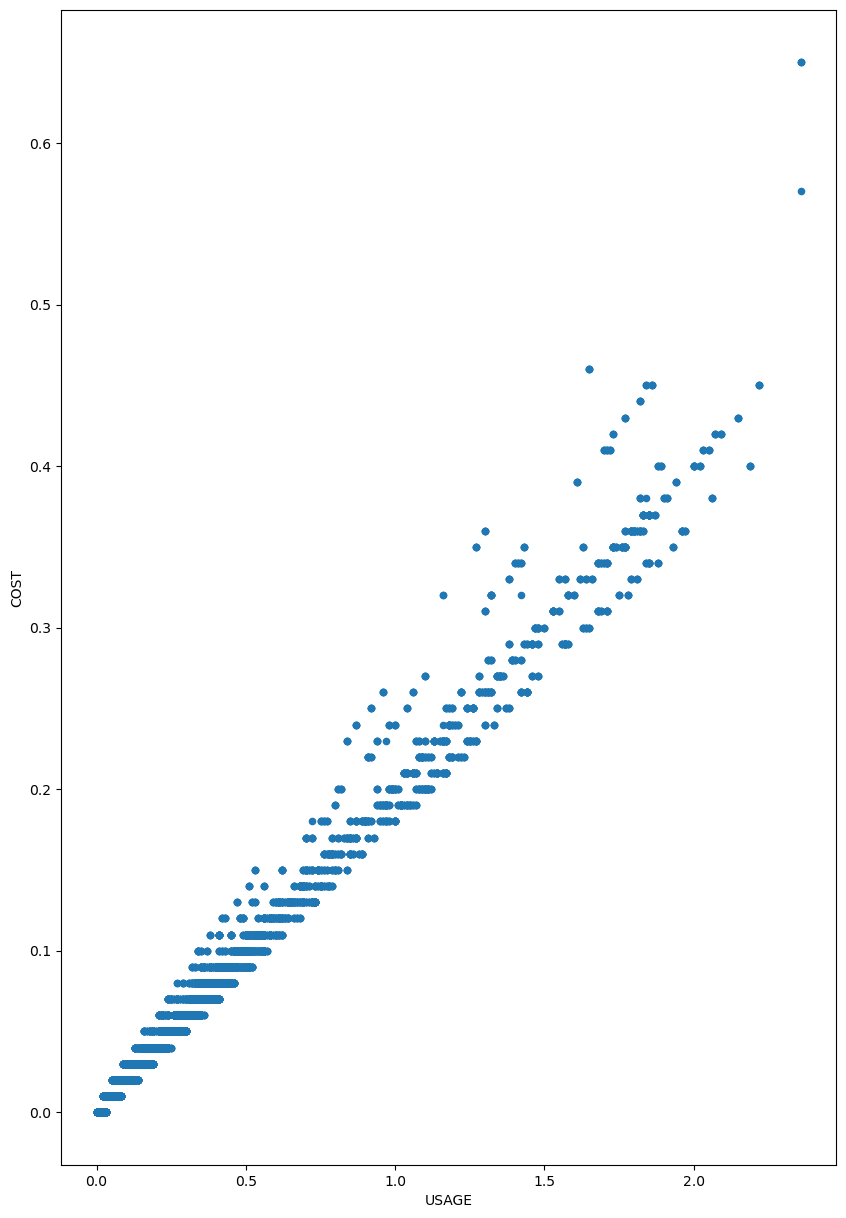

In [207]:
df.plot.scatter(x='USAGE', y='COST',figsize=(10, 15))

From the image, the pattern indicates that usage and cost have a positive correlation. Now let's see the correlation value of them both.

In [208]:
df.columns

Index(['DATE', 'START TIME', 'END TIME', 'USAGE', 'COST'], dtype='object')

In [209]:
df[['USAGE', 'COST']].corr(method='pearson')

,USAGE,COST
USAGE,1.000000,0.991939
COST,0.991939,1.000000


The correlation value is very high, indicating a strong linear relationship between the two variables. As one variable increases, the other variable tends to increase in a predictable manner. This strong correlation is useful for making predictions about one variable based on the value of the other.

# Creating timestamp column

DATE, START TIME, and END TIME columns are deleted since we have timestamp now.

In [210]:
add_prefix_lambda = lambda start_time: "0"+ start_time if int(start_time.split(":")[0]) < 12 else start_time
df["START TIME"] = df["START TIME"].apply(add_prefix_lambda)

df["TIMESTAMP"] = df["DATE"] + " " + df["START TIME"]

# Perbaiki format jam yang salah (menghapus angka ekstra di depan)
df["TIMESTAMP"] = df["TIMESTAMP"].str.replace(r" (\d{3}):", lambda x: f" {int(x.group(1)):02d}:", regex=True)

df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"], format="%m/%d/%Y %H:%M")


df = df.drop(columns=['DATE','START TIME','END TIME'])

In [211]:
df

,USAGE,COST,TIMESTAMP
0,0.01,0.00,2016-10-22 00:00:00
1,0.01,0.00,2016-10-22 00:15:00
2,0.01,0.00,2016-10-22 00:30:00
3,0.01,0.00,2016-10-22 00:45:00
4,0.01,0.00,2016-10-22 01:00:00
...,...,...,...
70363,0.02,0.00,2018-10-24 22:45:00
70364,0.03,0.01,2018-10-24 23:00:00
70365,0.03,0.01,2018-10-24 23:15:00
70366,0.03,0.01,2018-10-24 23:30:00


# Creating hourly_df 

The data is aggregrated into one-hour interval. This action simplifies the dataset, making it easier to analyze and visualize. Also, many reporting standards and practices are based on hourly data. Furthermore, in contexts like energy consumption or utility usage, billing cycles and usage tariffs are often based on hourly consumption. 

In [212]:
hourly_df = df.resample("1H", on="TIMESTAMP").sum()
hourly_df= hourly_df.reset_index()

In [213]:
hourly_df

,TIMESTAMP,USAGE,COST
0,2016-10-22 00:00:00,0.04,0.00
1,2016-10-22 01:00:00,0.04,0.00
2,2016-10-22 02:00:00,0.08,0.00
3,2016-10-22 03:00:00,0.04,0.00
4,2016-10-22 04:00:00,0.04,0.00
...,...,...,...
17587,2018-10-24 19:00:00,0.12,0.04
17588,2018-10-24 20:00:00,0.12,0.04
17589,2018-10-24 21:00:00,0.12,0.04
17590,2018-10-24 22:00:00,0.08,0.00


In [214]:
hourly_df['DAY'] = hourly_df['TIMESTAMP'].dt.day
hourly_df['MONTH'] = hourly_df['TIMESTAMP'].dt.month
hourly_df['YEAR'] = hourly_df['TIMESTAMP'].dt.year

# Electricity Usage per Year

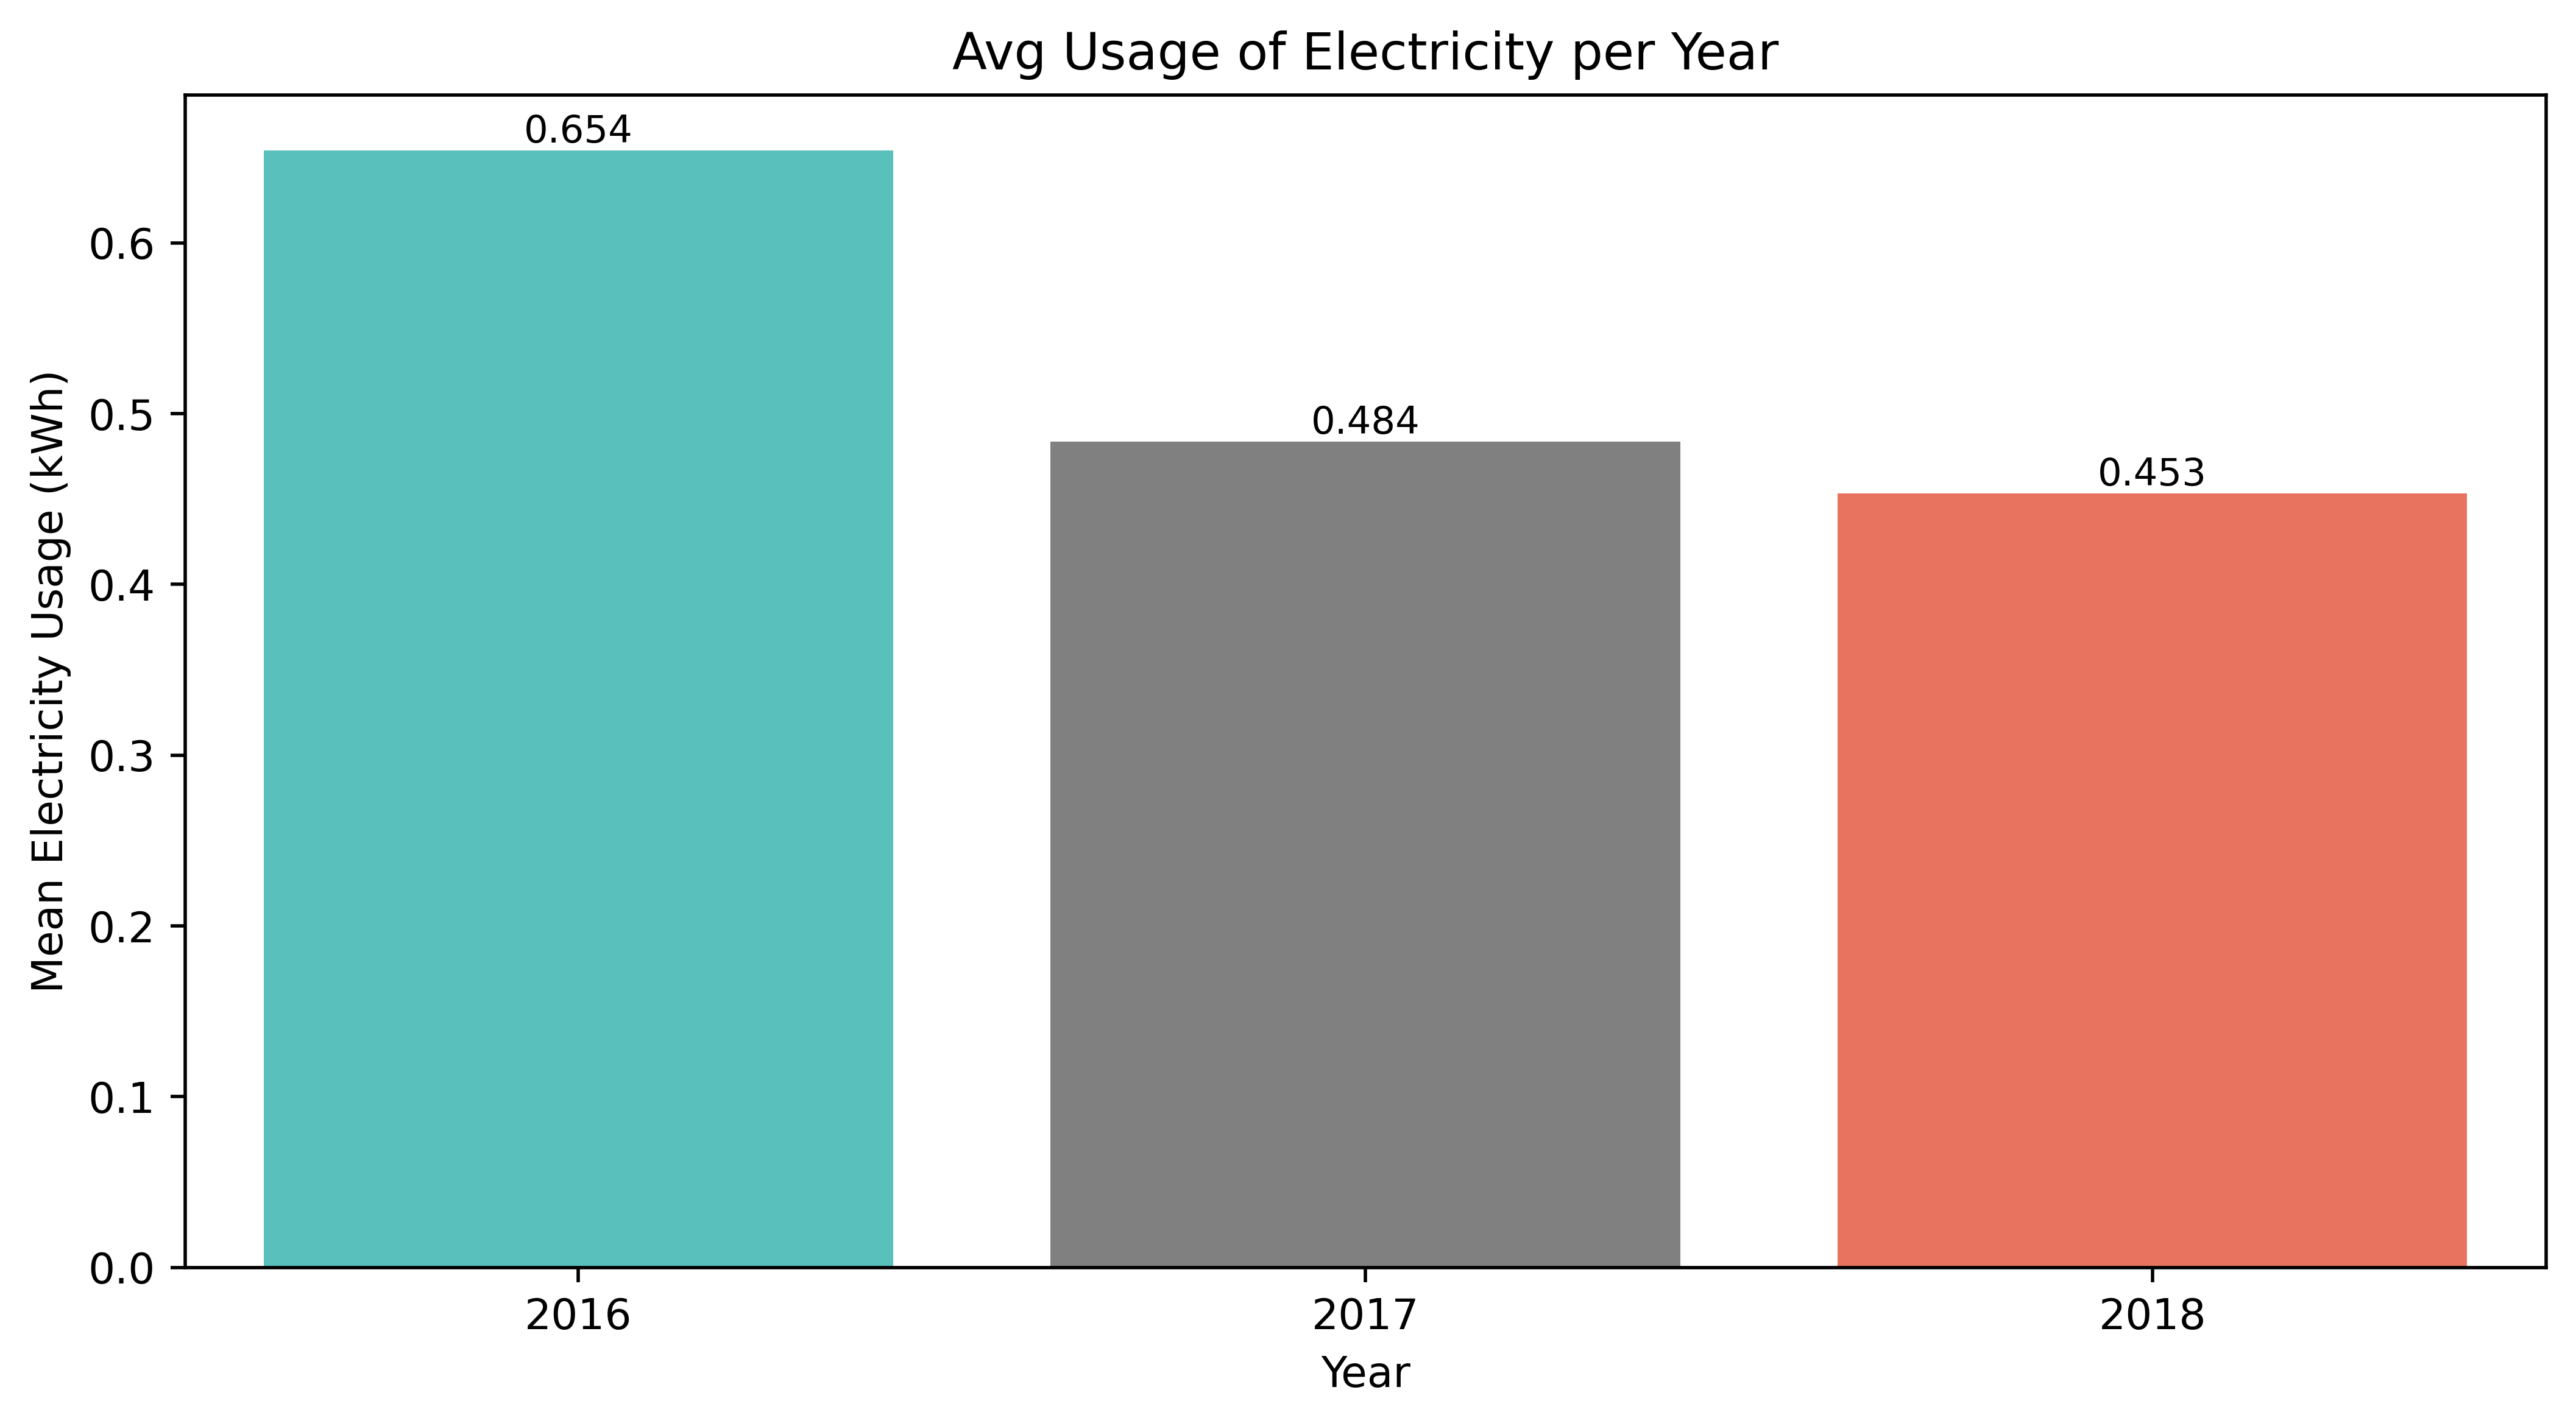

In [215]:
yearly_mean_usage = hourly_df.groupby('YEAR')['USAGE'].mean().reset_index()
yearly_mean_usage['YEAR'] = yearly_mean_usage['YEAR'].astype(int)

# Find year with maximum average usage
max_year = yearly_mean_usage.loc[yearly_mean_usage['USAGE'].idxmax(), 'YEAR']
min_year = yearly_mean_usage.loc[yearly_mean_usage['USAGE'].idxmin(), 'YEAR']

# Set green color for highest, orange for the rest
colors = [
    'mediumturquoise' if year == max_year else
    'tomato' if year == min_year else
    'gray' 
    for year in yearly_mean_usage['YEAR']
]

# Plotting the mean usage for weekdays and weekends using a barplot
plt.figure(figsize=(10, 5), dpi=500)
barplot = sns.barplot(data=yearly_mean_usage, x='YEAR', y='USAGE',palette=colors)

for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.3f}",
             ha='center', va='bottom', fontsize=9)
    
plt.title('Avg Usage of Electricity per Year')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Usage (kWh)')
plt.show()

We can observe that this customer's annual electricity consumption has been consistently decreasing. Further observation is required to determine the cause of this trend. It is possible that the customer has acquired a new job, leading to increased time spent in the office, or there could be other factors that encourage more activities outside the home. Also, the customer may be actively reducing their electricity usage as a cost-saving measure.

# Electricity Usage per Month

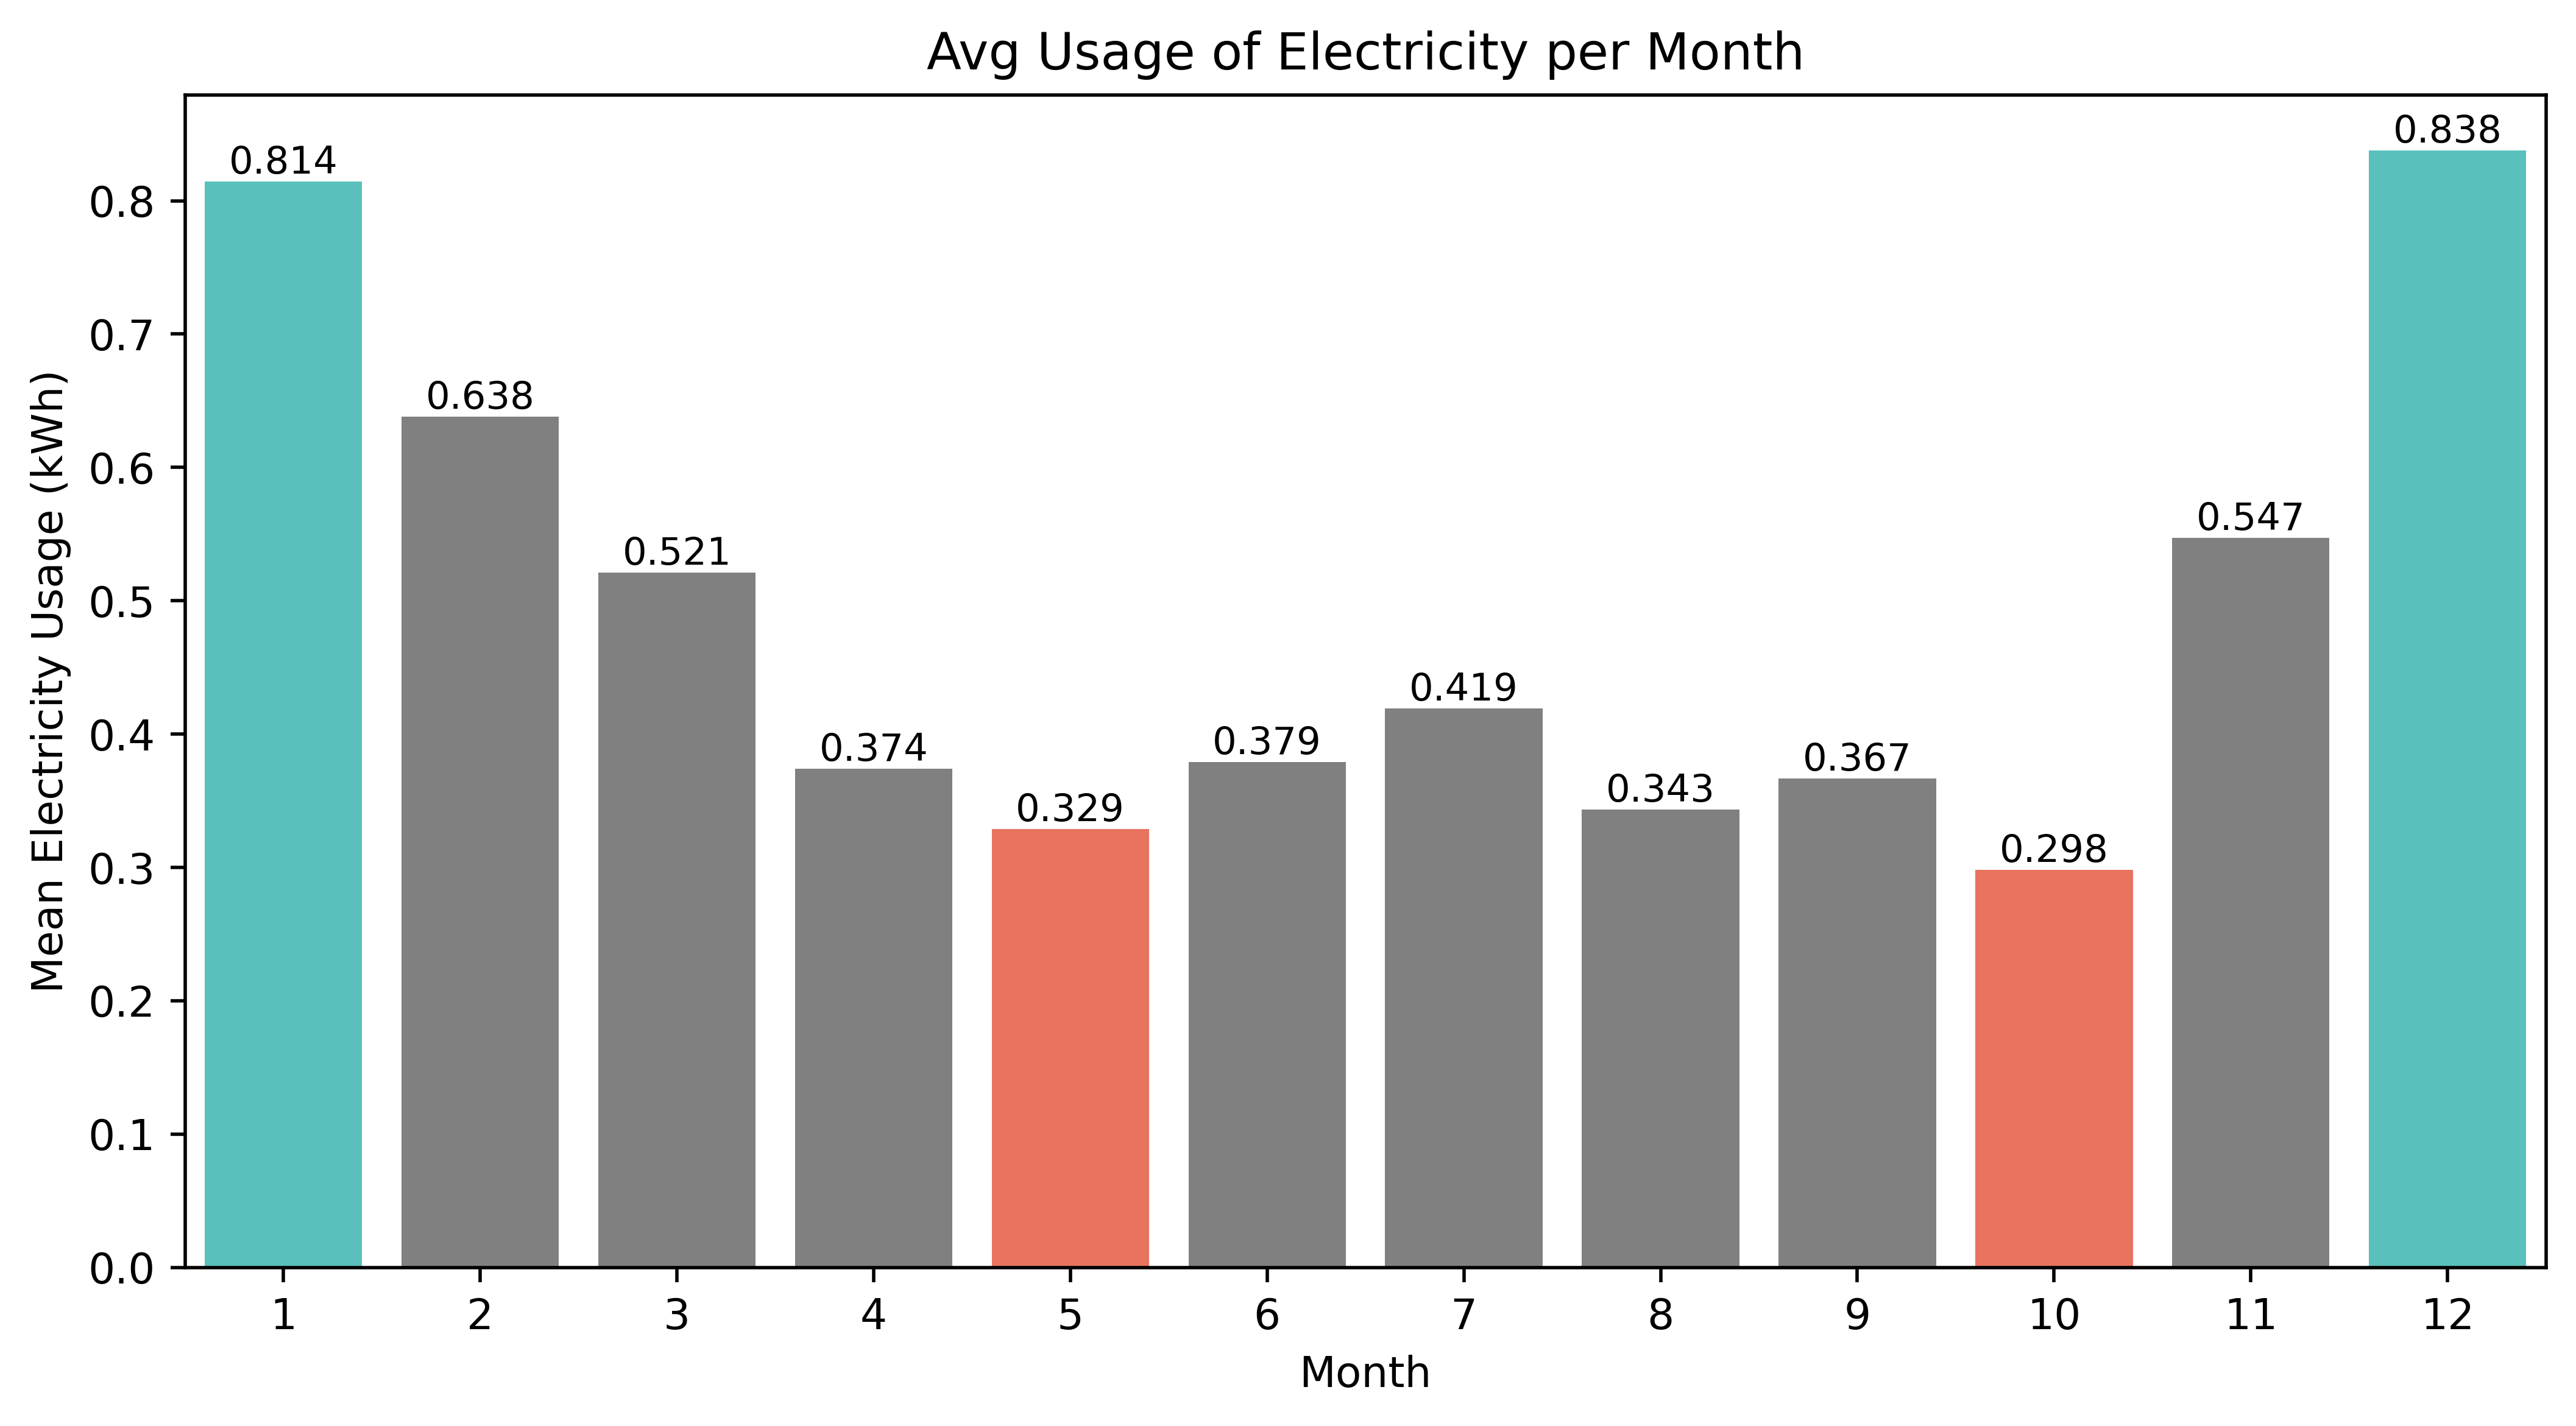

In [216]:
monthly_mean_usage = hourly_df.groupby('MONTH')['USAGE'].mean().reset_index()
monthly_mean_usage['MONTH'] = monthly_mean_usage['MONTH'].astype(int)


# Find avg monthly usage
top_two_months = monthly_mean_usage.nlargest(2, 'USAGE')['MONTH'].tolist()
bottom_two_months = monthly_mean_usage.nsmallest(2, 'USAGE')['MONTH'].tolist()

# Set green color for highest, orange for the rest
colors = [
    'mediumturquoise' if month in top_two_months else
    'tomato' if month in bottom_two_months else
    'gray'
    for month in monthly_mean_usage['MONTH']
]

# Plotting the mean usage for weekdays and weekends using a barplot
plt.figure(figsize=(10, 5), dpi=500)
barplot = sns.barplot(data=monthly_mean_usage, x='MONTH', y='USAGE', palette=colors)

for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.3f}",
             ha='center', va='bottom', fontsize=9)
    
plt.title('Avg Usage of Electricity per Month')
plt.xlabel('Month')
plt.ylabel('Mean Electricity Usage (kWh)')
plt.show()

The monthly electricity usage data reveals a notable pattern: this customer's consumption peaks during January, February, November, and December, the winter months in San Francisco. This increase is likely due to more time spent indoors, necessitating higher heater usage. The winter is not that cold in San Fransisco, so the heater usage may be lower than any other area with snow. Conversely, electricity consumption appears to decrease during the summer months, possibly because the customer spends more time away from their apartment, enjoying outdoor activities such as going to the beach or on vacation.

To prove our hypothesis concerning heating usage, let's examine the actual temperature data for San Francisco in the years 2016, 2017, and 2018 (Source: weatherspark.com). The temperature trends during these years, specifically in January, February, November, and December lend support to our assumptions about heater usage.

Temperature history in 2016 in San Francisco


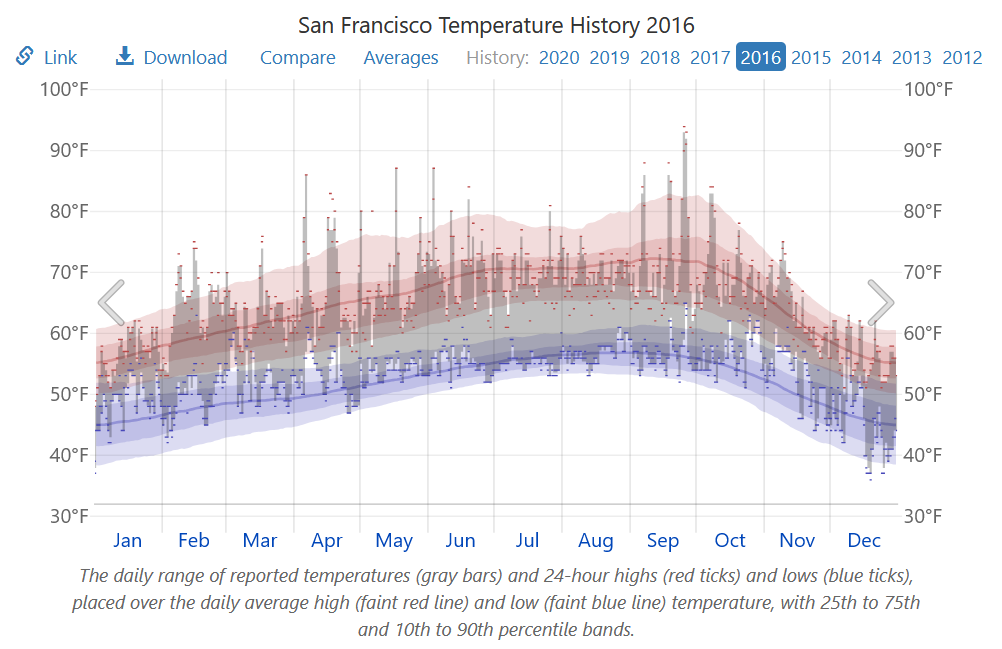

Temperature history in 2017 in San Francisco


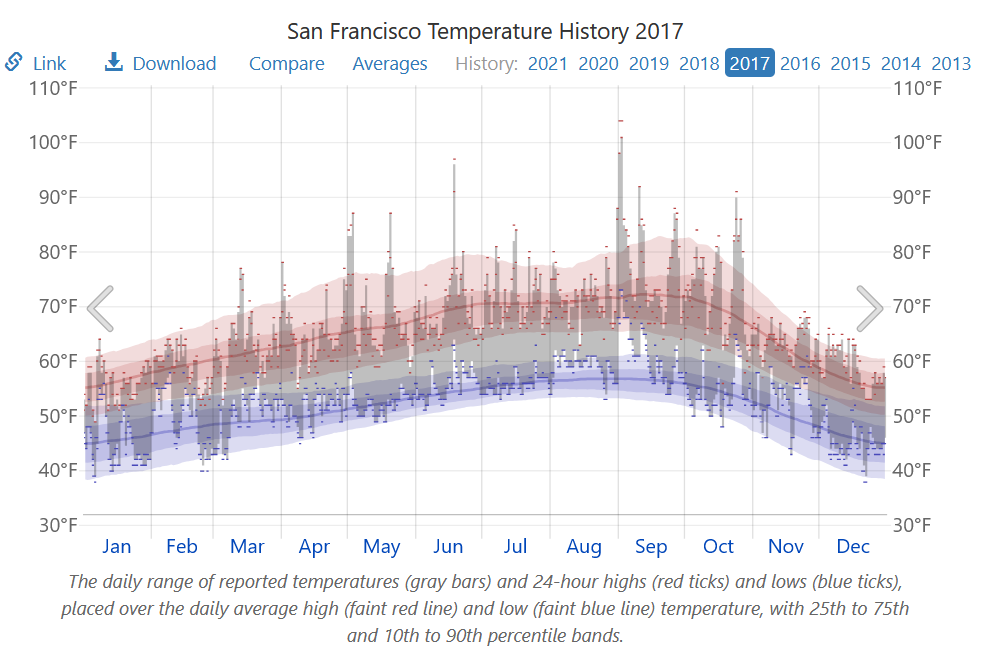

Temperature history in 2018 in San Francisco


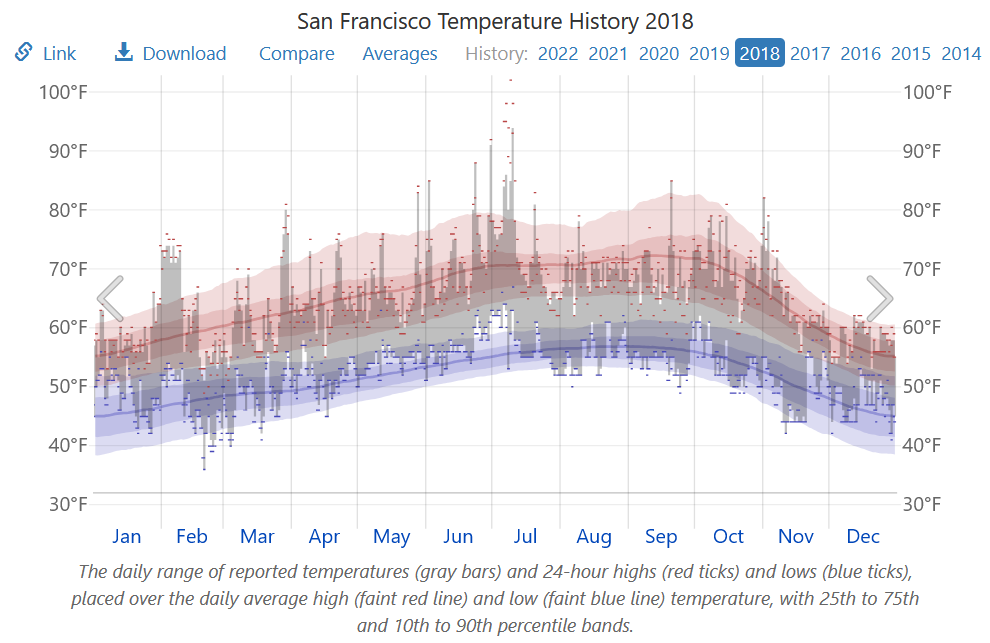

# Electricity Usage per Date (Day)

Now let's see the electricity usage per date (day)

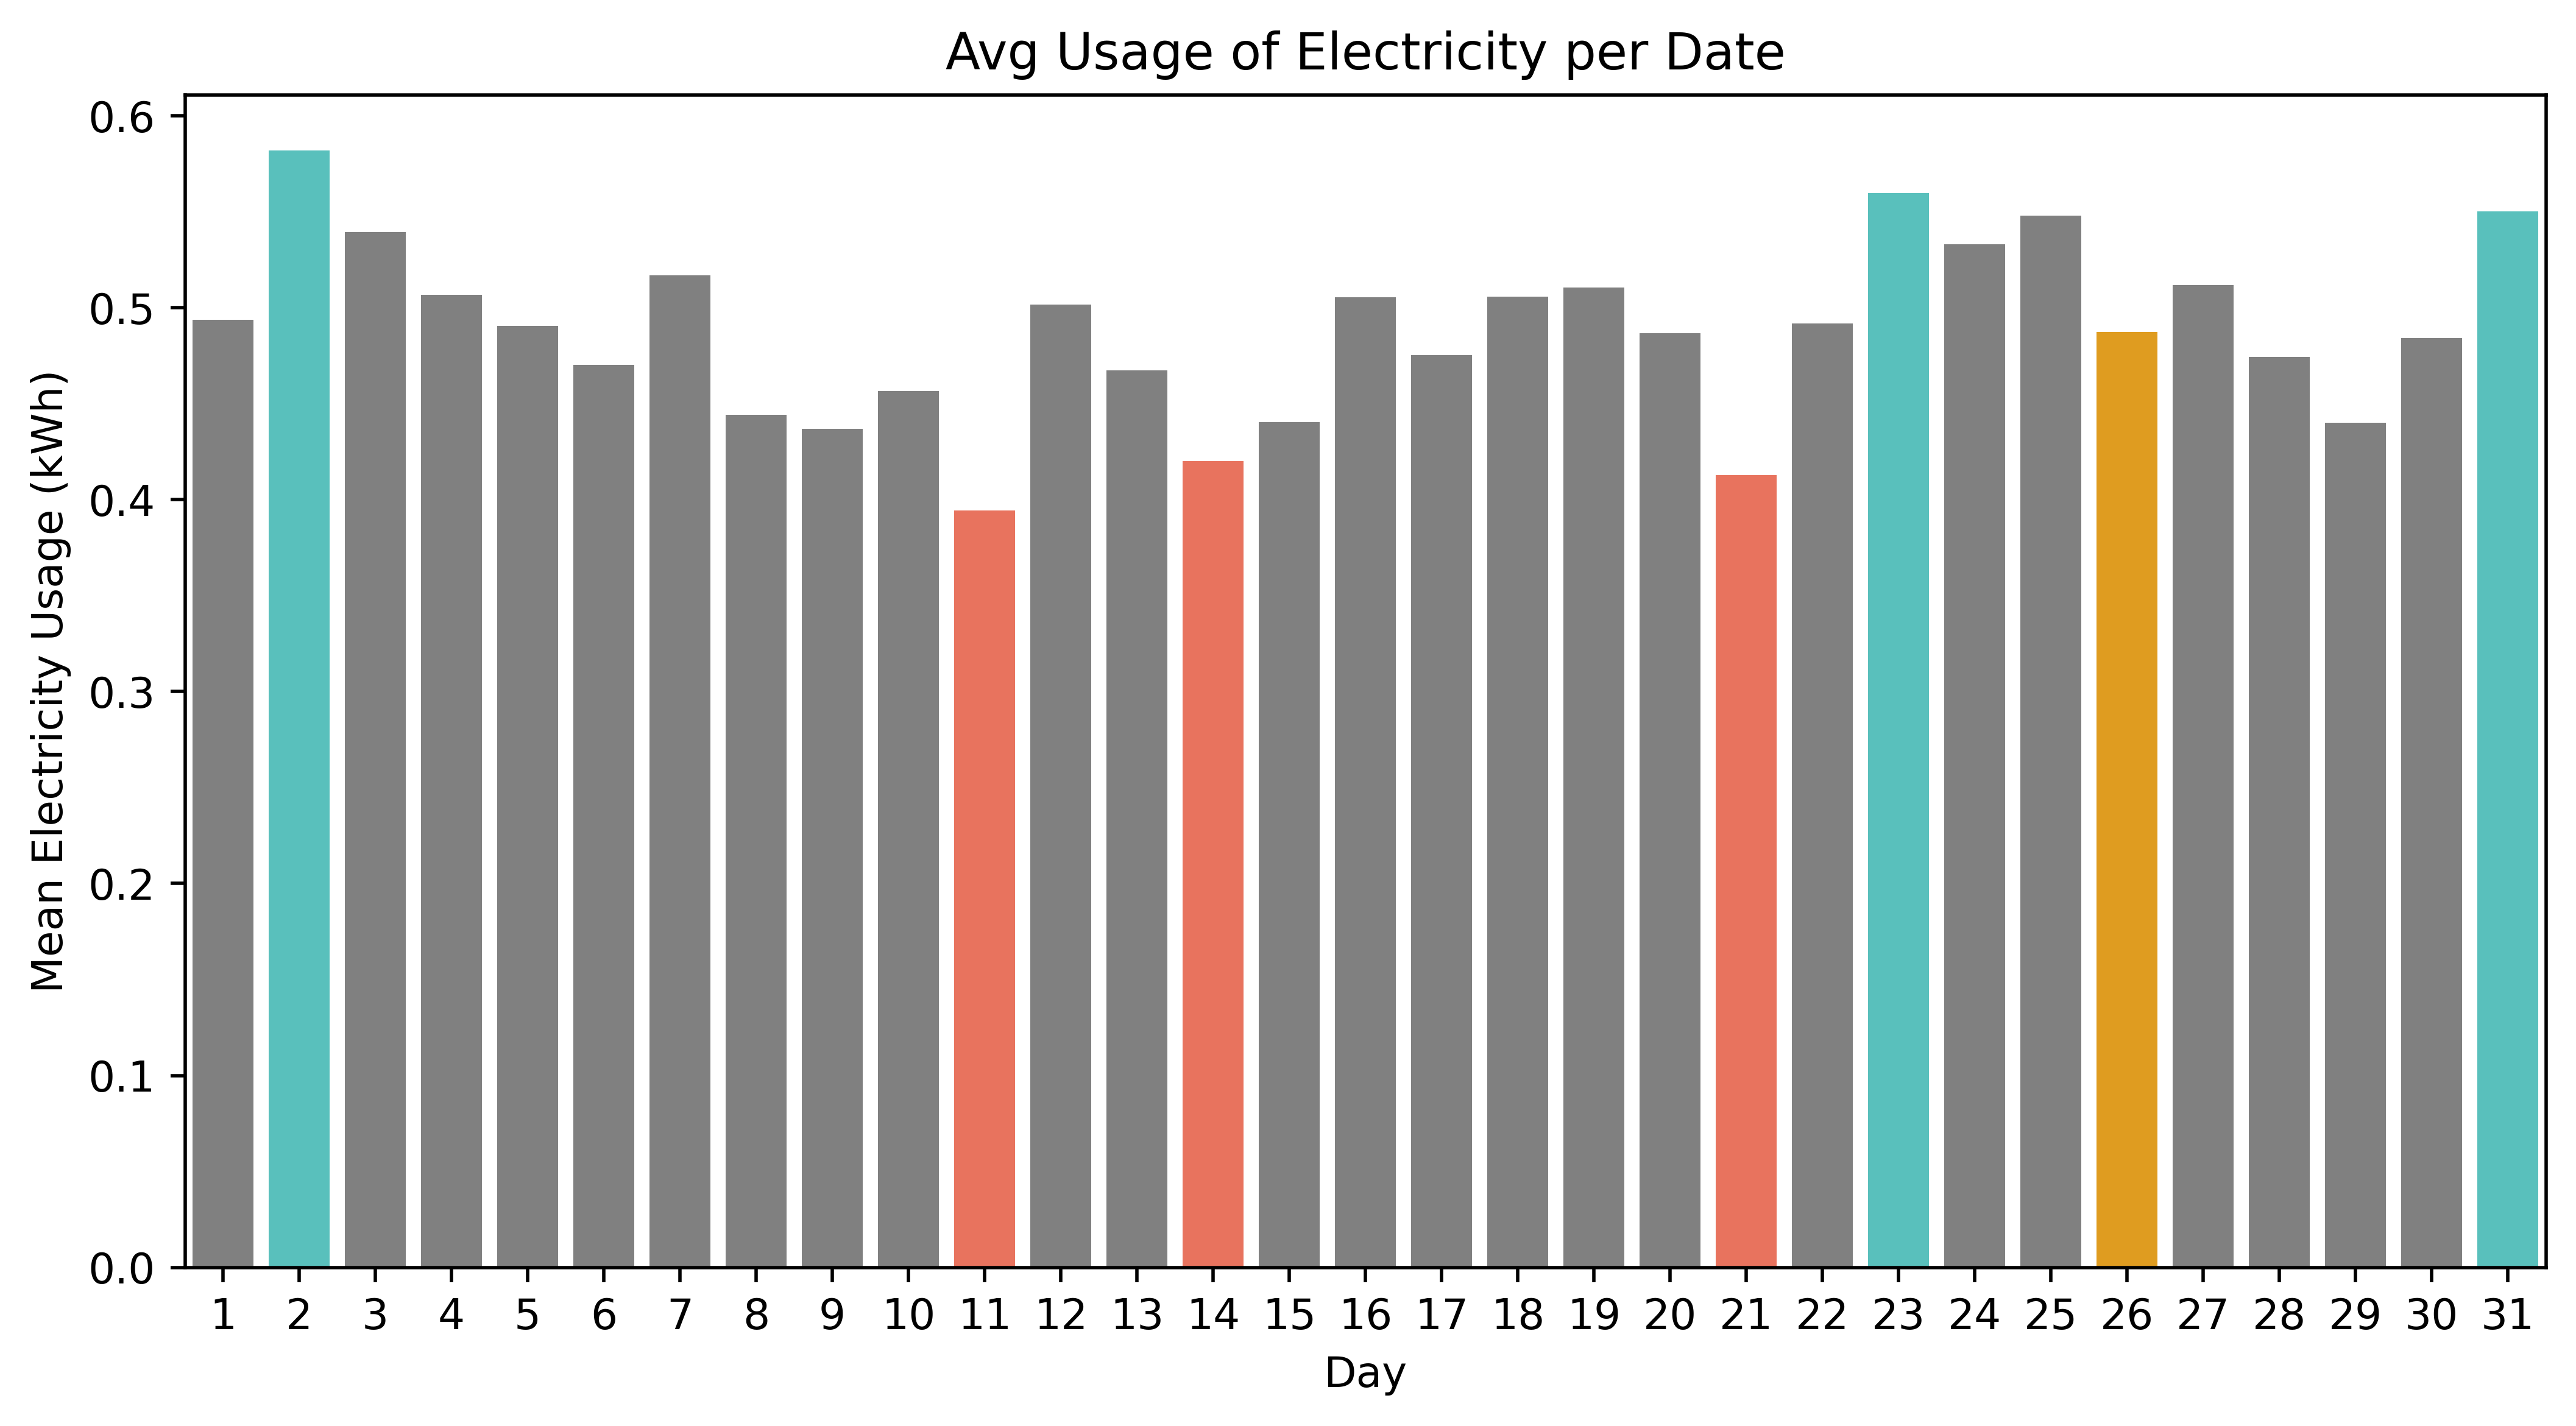

In [217]:
daily_mean_usage = hourly_df.groupby('DAY')['USAGE'].mean().reset_index()
daily_mean_usage['DAY'] = daily_mean_usage['DAY'].astype(int)

top_3_max_df = daily_mean_usage.nlargest(3, 'USAGE')[['DAY', 'USAGE']]
top_3_min_df = daily_mean_usage.nsmallest(3, 'USAGE')[['DAY', 'USAGE']]

avg_usage = daily_mean_usage['USAGE'].mean()

# Find usage which is closest to the average
avg_df = daily_mean_usage[abs(daily_mean_usage['USAGE'] - avg_usage) < 1e-3][['DAY', 'USAGE']].copy()


colors = [
    'mediumturquoise' if usage in top_3_max_df['USAGE'].values else
    'tomato' if usage in top_3_min_df['USAGE'].values else
    'orange' if usage in avg_df['USAGE'].values else
    'gray'
    for usage in daily_mean_usage['USAGE']
]

# Plotting the mean usage for weekdays and weekends using a barplot
plt.figure(figsize=(10, 5), dpi=500)
sns.barplot(data=daily_mean_usage, x='DAY', y='USAGE', palette=colors)

plt.title('Avg Usage of Electricity per Date')
plt.xlabel('Day')
plt.ylabel('Mean Electricity Usage (kWh)')
plt.show()

We can observe some slight differences in electricity usage when grouped by date. Now, let's examine the top 3 dates with the highest and lowest electricity usage.

In [218]:
top_3_max_df

,DAY,USAGE
1,2,0.581806
22,23,0.559800
30,31,0.550238


In [219]:
top_3_min_df

,DAY,USAGE
10,11,0.394306
20,21,0.412708
13,14,0.420000


Well, it is kinda hard to analyze the pattern. We need to extract more features. Let's start with extracting day_name feature.

In [220]:
# Extract the day name
hourly_df['DAY_NAME'] = hourly_df['TIMESTAMP'].dt.day_name()

Now, let's see the electricity usage per day

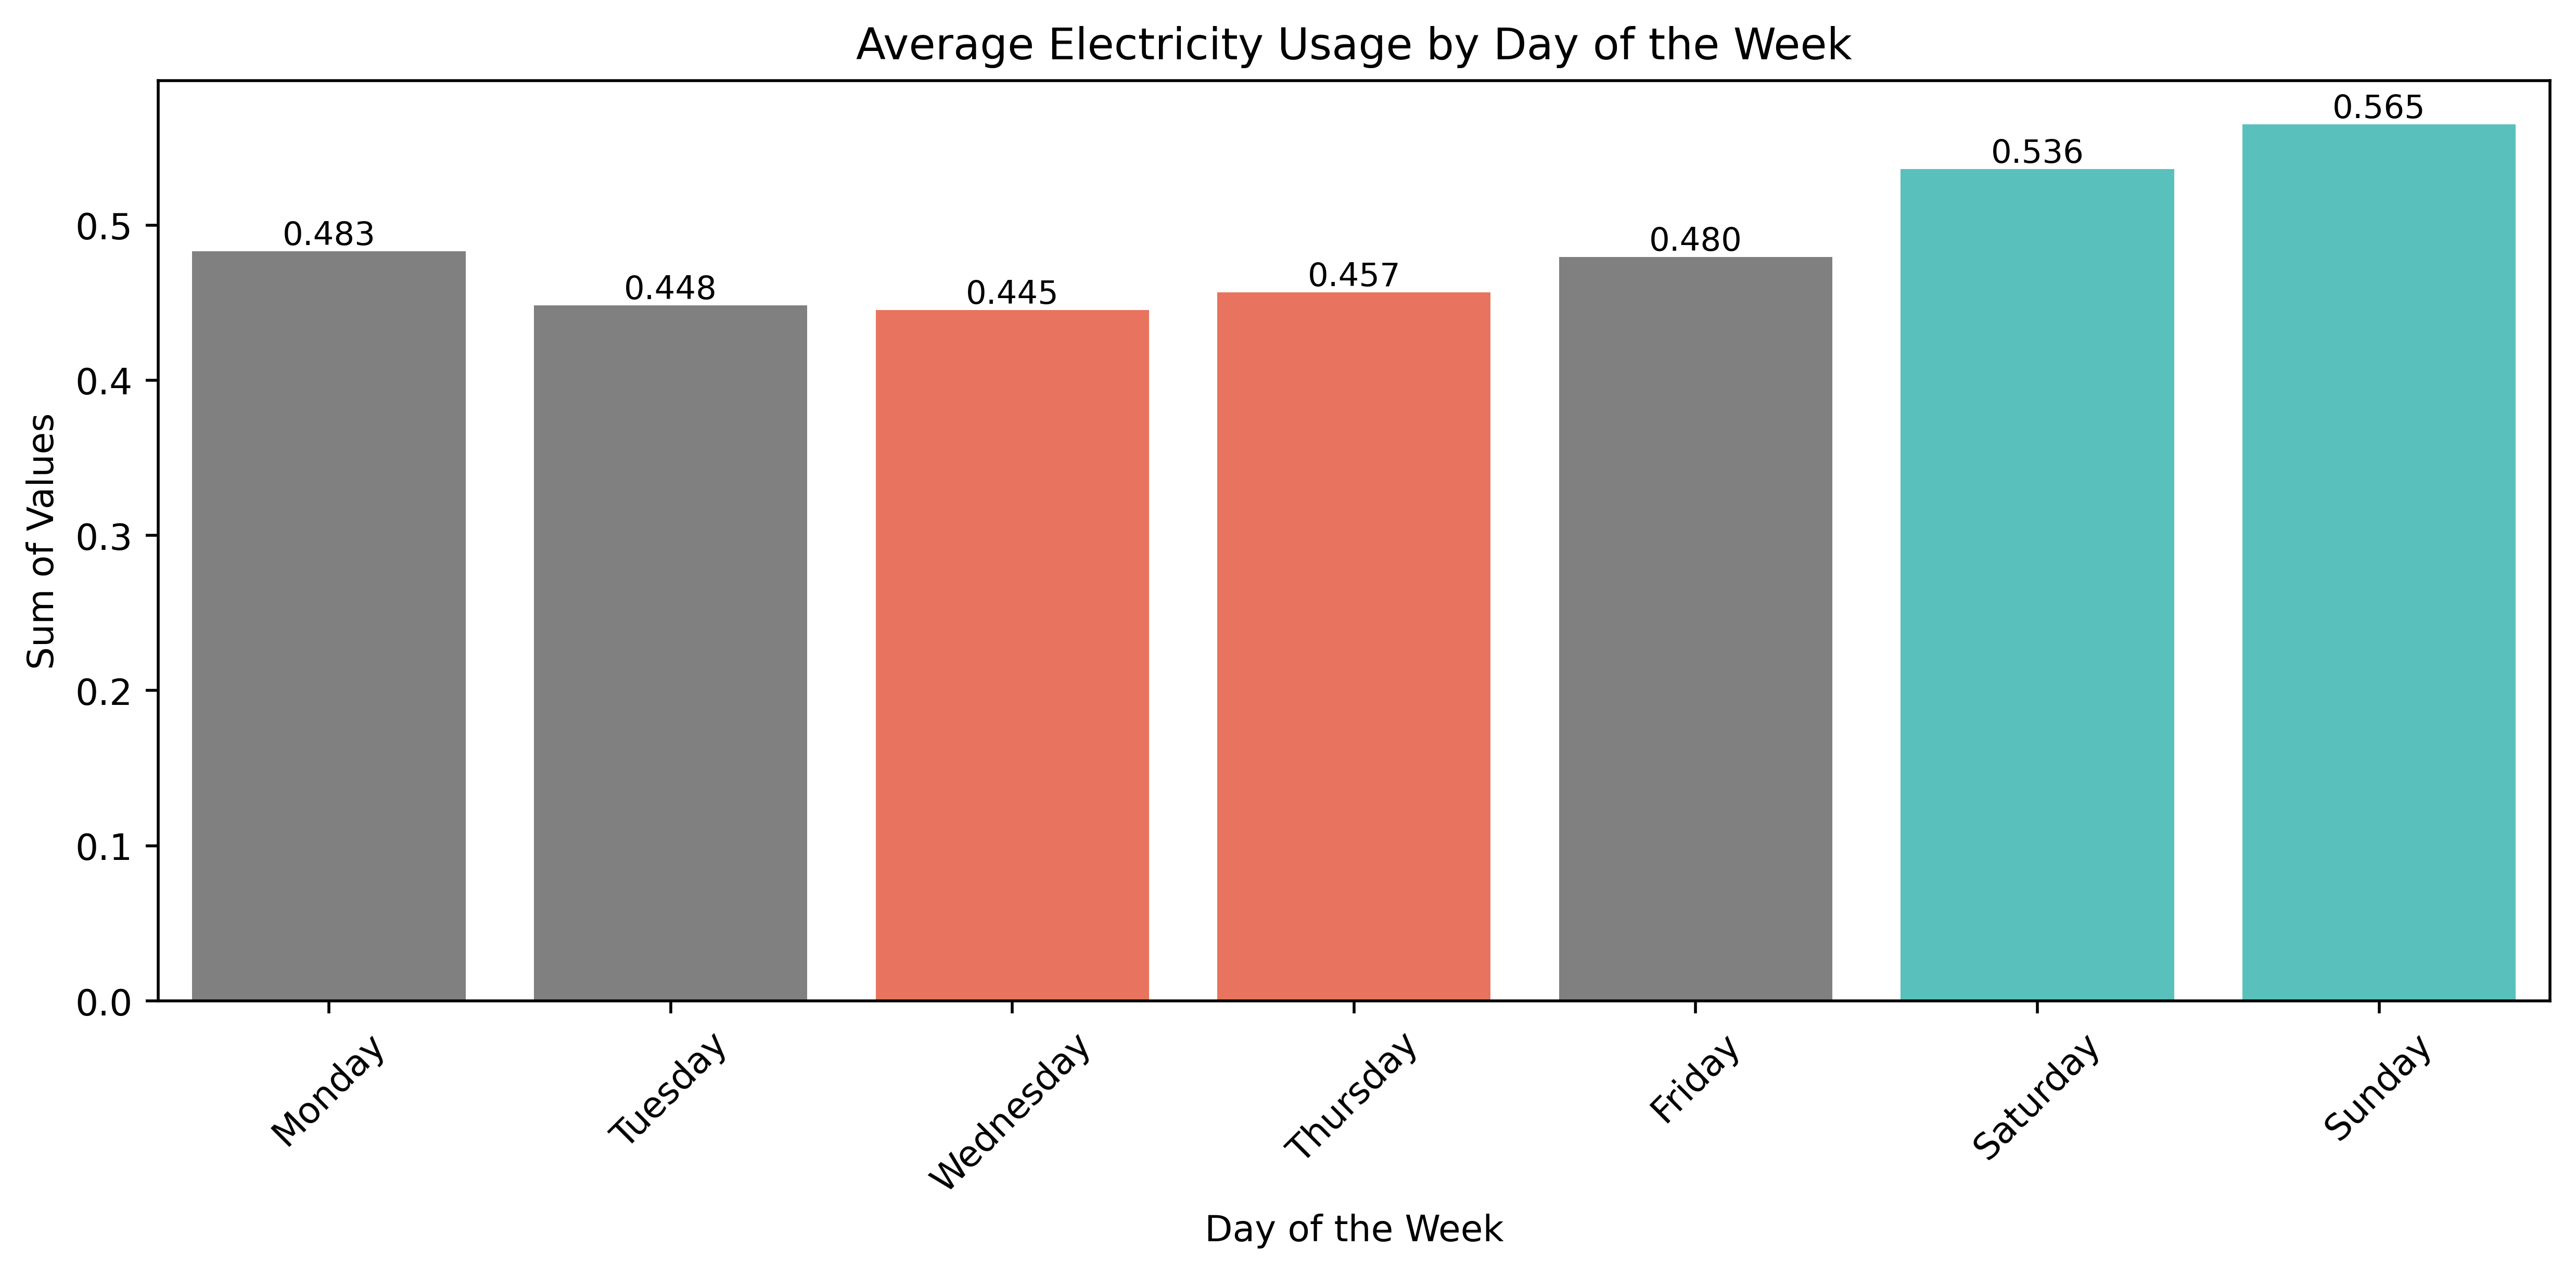

In [221]:
day_mean_usage = hourly_df.groupby('DAY_NAME')['USAGE'].mean().reset_index()

days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_mean_usage['DAY_NAME'] = pd.Categorical(day_mean_usage['DAY_NAME'], categories=days_ordered, ordered=True)

sorted_usage = day_mean_usage.sort_values('USAGE', ascending=False)

top_2_min_days = sorted_usage.iloc[:2]['DAY_NAME'].values 
top_2_max_days = sorted_usage.iloc[-2:]['DAY_NAME'].values 

colors = []
for day in day_mean_usage['DAY_NAME']:
    if day in top_2_min_days:
        colors.append('tomato')
    elif day in top_2_max_days:
        colors.append('mediumturquoise')
    else:
        colors.append('gray') 

# Plotting
plt.figure(figsize=(10, 5), dpi=500)
barplot = sns.barplot(data=day_mean_usage, x='DAY_NAME', y='USAGE', palette=colors)

for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.3f}",
             ha='center', va='bottom', fontsize=9)

plt.title('Average Electricity Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sum of Values')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The pattern is now clear: electricity usage is higher on the weekends, specifically on Saturdays and Sundays. This could be due to the user spending more time at home during these days. Conversely, on weekdays, the lower home electricity usage might result from the user going to work and consequently using electricity at the office instead of at home.

What feature that can we extract next? Let's try extracting the IS_HOLIDAY feature.

Finally, let's see the plot of average electricity usage per hour.

# Electricity Usage per Hour

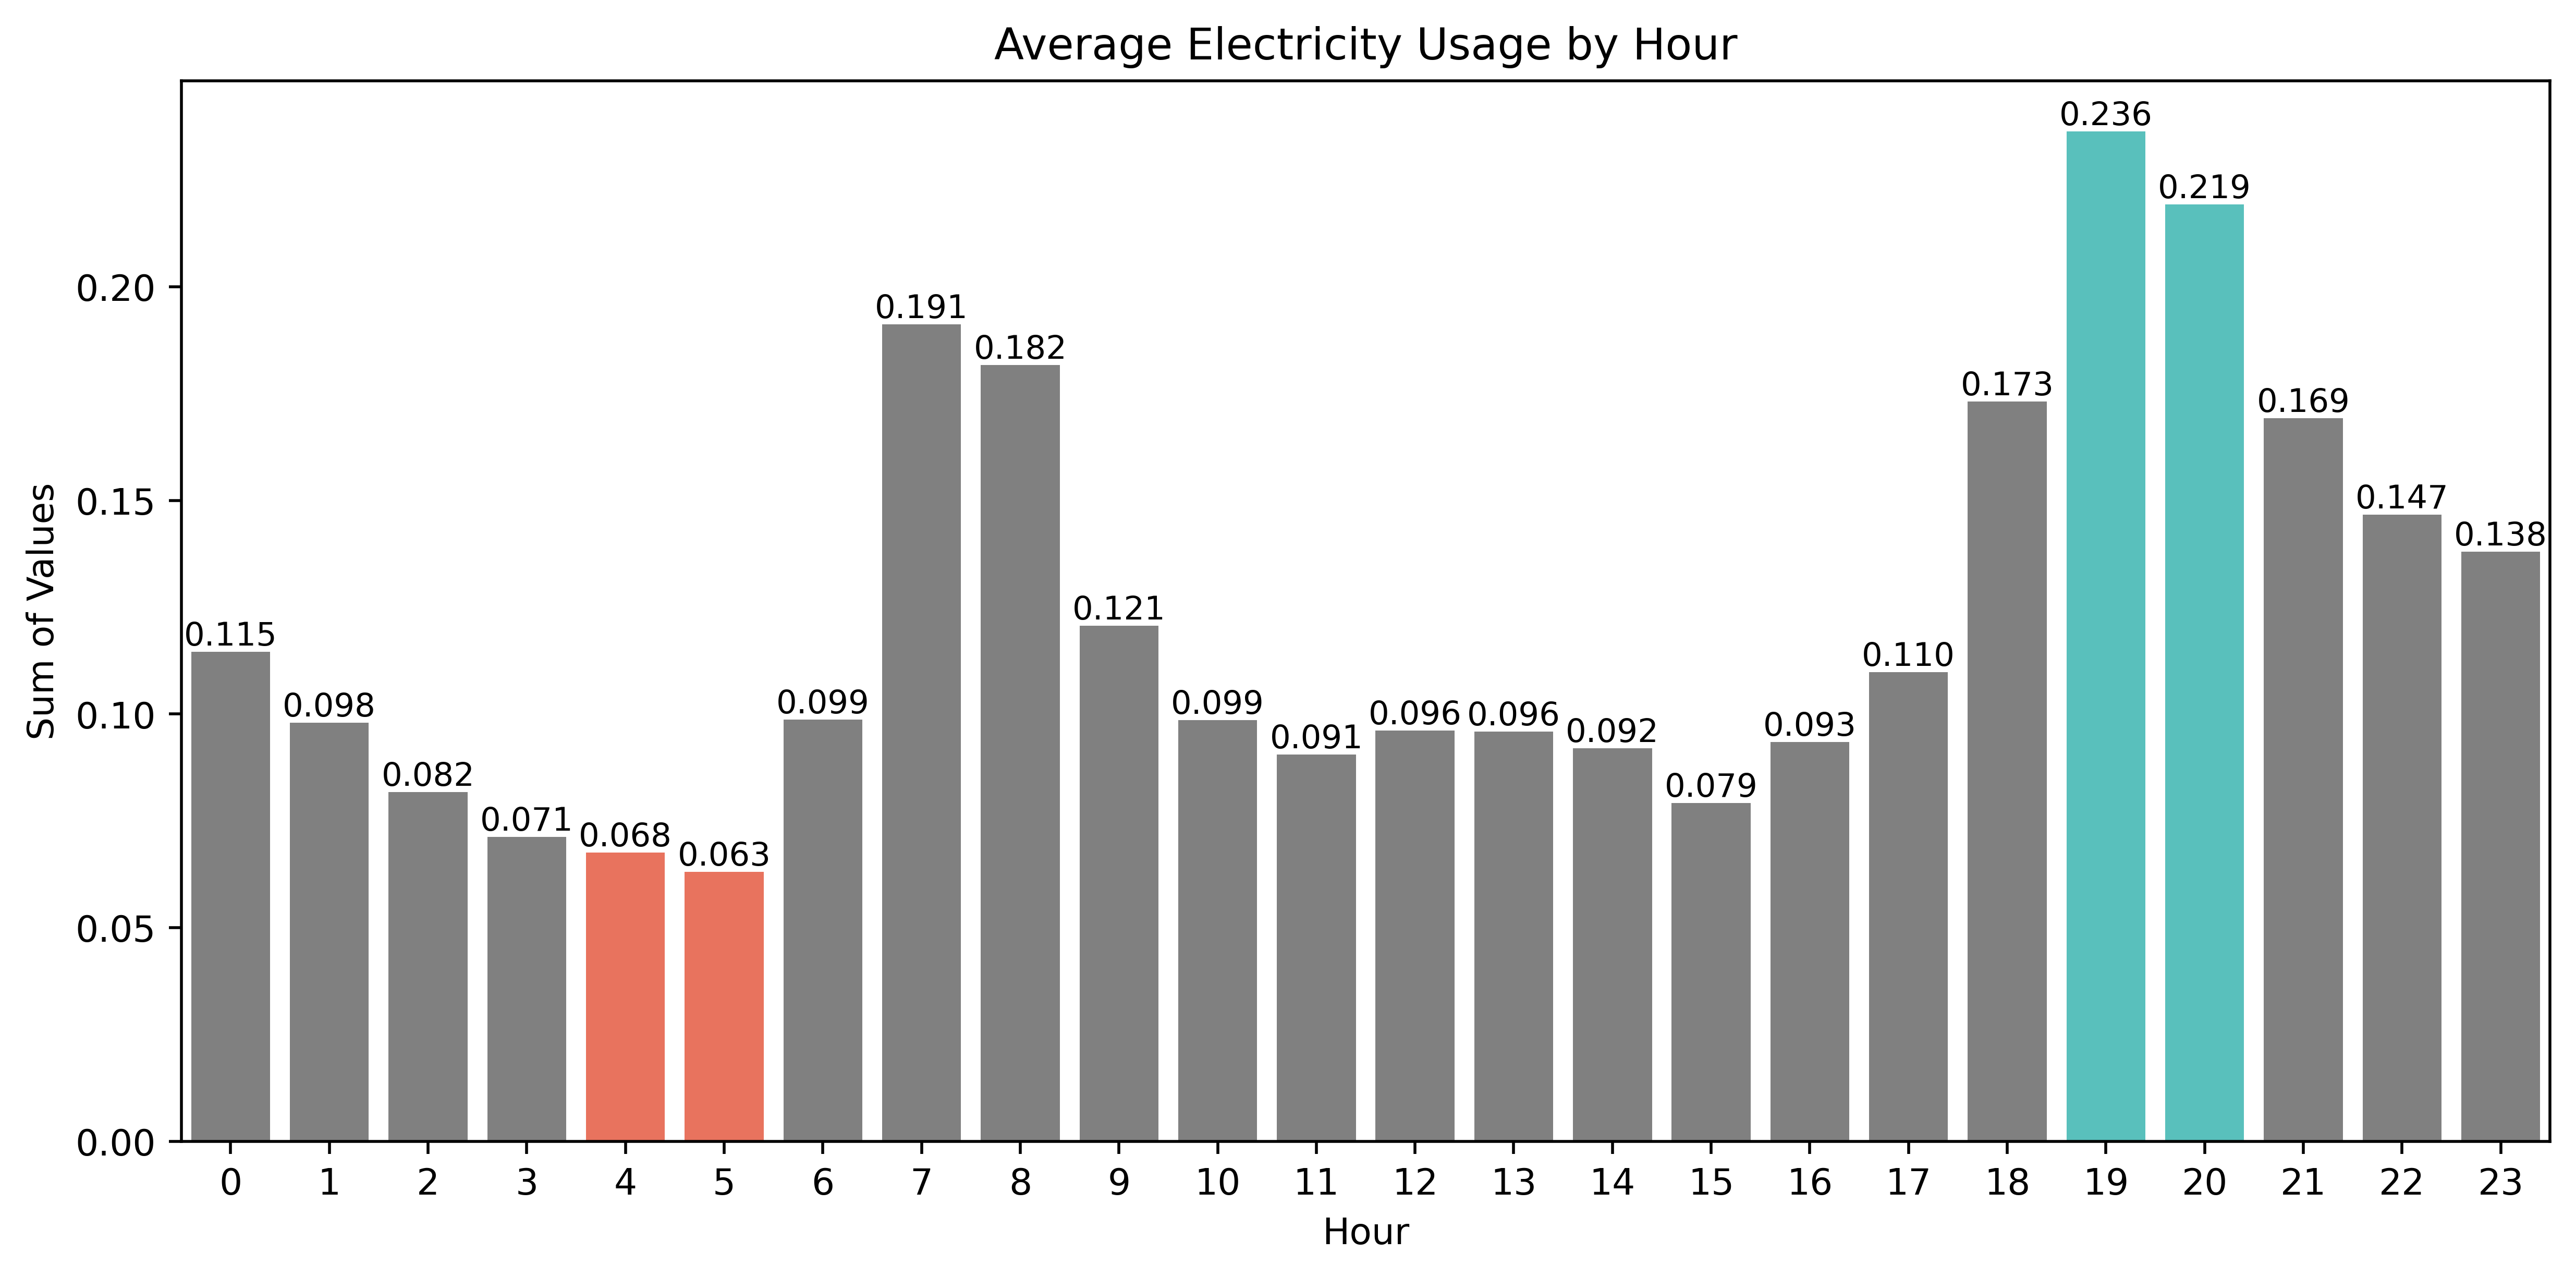

In [227]:
df["HOUR"] = df["TIMESTAMP"].dt.hour

hourly_usage = df.groupby("HOUR")["USAGE"].mean().reset_index()

# Find avg monthly usage
top_two_hour = hourly_usage.nlargest(2, 'USAGE')['HOUR'].tolist()
bottom_two_hour = hourly_usage.nsmallest(2, 'USAGE')['HOUR'].tolist()

colors = [
    'mediumturquoise' if hour in top_two_hour else
    'tomato' if hour in bottom_two_hour else
    'gray'
    for hour in hourly_usage['HOUR']
]

# Plotting
plt.figure(figsize=(10, 5), dpi=500)
barplot = sns.barplot(data=hourly_usage, x='HOUR', y='USAGE',palette=colors)

for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.3f}",
             ha='center', va='bottom', fontsize=9)

plt.title('Average Electricity Usage by Hour')
plt.xlabel('Hour')
plt.ylabel('Sum of Values')
plt.tight_layout()

plt.show()

It turns out that the highest average electricity usage occurs from 19:00 to 20:00. After that, it decreases until reaching the lowest average electricity usage between 4:00 and 5:00. Then, it rises again at 7:00 before dropping once more between 8:00 and 15:00. The usage gradually increases from 16:00, reaching its peak again at 19:00. This cycle repeats continuously.

# Final Dashboard and Recommendations

In [226]:
import plotly.express as px

# Monthly
monthly_mean_usage = hourly_df.groupby('MONTH')['USAGE'].mean().reset_index()
monthly_mean_usage['MONTH'] = monthly_mean_usage['MONTH'].astype(int)

top_two_months = monthly_mean_usage.nlargest(2, 'USAGE')['MONTH'].tolist()
bottom_two_months = monthly_mean_usage.nsmallest(2, 'USAGE')['MONTH'].tolist()

monthly_mean_usage['COLOR'] = [
    'mediumturquoise' if month in top_two_months else
    'tomato' if month in bottom_two_months else
    'gray'
    for month in monthly_mean_usage['MONTH']
]

# Hourly
hourly_df["HOUR"] = hourly_df["TIMESTAMP"].dt.hour
hourly_usage = hourly_df.groupby("HOUR")["USAGE"].mean().reset_index()

top_two_hour = hourly_usage.nlargest(2, 'USAGE')['HOUR'].tolist()
bottom_two_hour = hourly_usage.nsmallest(2, 'USAGE')['HOUR'].tolist()

hourly_usage['COLOR'] = [
    'mediumturquoise' if hour in top_two_hour else
    'tomato' if hour in bottom_two_hour else
    'gray'
    for hour in hourly_usage['HOUR']
]

# Day of Week
day_mean_usage = hourly_df.groupby('DAY_NAME')['USAGE'].mean().reset_index()
days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_mean_usage['DAY_NAME'] = pd.Categorical(day_mean_usage['DAY_NAME'], categories=days_ordered, ordered=True)

top_two_days = day_mean_usage.nlargest(2, 'USAGE')['DAY_NAME'].tolist()
bottom_two_days = day_mean_usage.nsmallest(2, 'USAGE')['DAY_NAME'].tolist()

day_mean_usage['COLOR'] = [
    'mediumturquoise' if day in top_two_days else
    'tomato' if day in bottom_two_days else
    'gray'
    for day in day_mean_usage['DAY_NAME']
]

# Monthly
fig_monthly = px.bar(
    monthly_mean_usage, 
    x='MONTH', 
    y='USAGE', 
    title="Average Electricity Usage per Month", 
    color='COLOR',
    color_discrete_map={'mediumturquoise': 'mediumturquoise', 'tomato': 'tomato', 'gray': 'gray'}
)

fig_monthly.update_layout(
    xaxis_title="Month",
    yaxis_title="Mean Electricity Usage (kWh)",
    showlegend=False
)

# Hourly
fig_hourly = px.bar(
    hourly_usage, 
    x='HOUR', 
    y='USAGE', 
    title="Average Electricity Usage per Hour", 
    color='COLOR',
    color_discrete_map={'mediumturquoise': 'mediumturquoise', 'tomato': 'tomato', 'gray': 'gray'}
)

fig_hourly.update_layout(
    xaxis_title="Hour",
    yaxis_title="Mean Electricity Usage (kWh)",
    showlegend=False
)

# Weekly
fig_daily = px.bar(
    day_mean_usage, 
    x='DAY_NAME', 
    y='USAGE', 
    title="Average Electricity Usage per Day of the Week", 
    color='COLOR',
    category_orders={'DAY_NAME': days_ordered},
    color_discrete_map={'mediumturquoise': 'mediumturquoise', 'tomato': 'tomato', 'gray': 'gray'}
)

fig_daily.update_layout(
    xaxis_title="Day of the Week",
    yaxis_title="Mean Electricity Usage (kWh)",
    showlegend=False
)

fig_monthly.show()
fig_hourly.show()
fig_daily.show()


Recommendation:
With the assumption that every household in the neighborhood has the same average electricity usage as this household. The values presented in kWh per household (kWh/household) represent the average consumption per household, not the total neighborhood consumption. To estimate the actual electricity demand for the entire neighborhood, these values should be multiplied by the total number of households. Since we are using average values instead of total consumption, the suggested adjustments in electricity production should be based on this scaled estimate.
We can suggest to the electricity producer:

1. Monthly Production:
   - Increase electricity production from December to January to approximately 0.84 kWh/household.
   - Gradually reduce production in the following months, with a decrease of around 0.2 kWh per household per month, reaching a minimum of 0.32 kWh/household.
   - Increase production slightly in June by 0.1 kWh/household and maintain a stable level until September.
   - Reduce electricity production in October to around 0.3 kWh/household, but prepare for an increase in November to 0.54 kWh/household.

2. Hourly Production:
   - Allocate 0.95 kWh/household during peak hours (19:00 - 20:00).
   - Gradually decrease supply by 0.1 kWh per household per hour until reaching 0.25 kWh/household at 05:00.
   - Prepare for an increase at 06:00, where consumption rises to 0.39 kWh/household.
   - Consumption peaks at 07:00 (0.75 kWh/household) before slightly declining as morning activities settle.
   - From 08:00 to 15:00, electricity consumption remains moderate, fluctuating between 0.45 - 0.55 kWh/household, reflecting a mix of residential and minimal appliance use.
   - In the afternoon, energy demand starts rising at 16:00, reaching 0.8 kWh/household by 18:00, before peaking again at 19:00 - 20:00.

3. Weekly Production:
   - Increase electricity production on Saturdays and Sundays to approximately 0.56 kWh/household.
   - Reduce production on Monday to 0.48 kWh/household.
   - Maintain a steady level of around 0.5 kWh/household for Tuesday and Wednesday.
   - Gradually increase production by 0.02 kWh/household per day for the remainder of the week.
